In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import string

import matplotlib
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
from pymongo import MongoClient
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    plot_roc_curve,
    precision_score,
    recall_score,
)
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
sns.set_theme()

In [14]:
#data = pd.read_json('Movies_and_TV_5.json', lines=True)

NameError: name 'one_star_reviews' is not defined

In [3]:

from pymongo import MongoClient

client = MongoClient('localhost', 27017)
db = client['amazon_reviews']
reviews = db['reviews']
reviews_cleaned = db['reviews_cleaned']

In [16]:
#for row_num in range(data.shape[0]):
#    row = (data.iloc[row_num])
#    reviews.insert_one({'reviewerID': str(row['reviewerID']), 'asin':str(row['asin']), 'reviewerName':row['reviewerName'], 'reviewText': row['reviewText'], 'helpful':row['helpful'], 'overall':str(row['overall']), 'summary':row['summary'], 'unixReviewTime':str(row['unixReviewTime']), 'reviewTime':row['reviewTime']})

In [4]:
original_df = pd.DataFrame(reviews_cleaned.find({}, {'stemmed':0}))

In [5]:
df = original_df

In [6]:
df['review_char_length'] = df['reviewText'].apply(len)
df['stars'] = df['overall'].apply(lambda x: int(x))
df = df[(df['review_char_length']>500) & (df['review_char_length'] < 3000)]

In [7]:
df

,_id,reviewerID,asin,reviewerName,reviewText,helpful,overall,summary,unixReviewTime,reviewTime,lemmatized,review_char_length,stars
6,607dba47dc472093f35639ff,A5NYUBEKXFLX5,0005019281,"B. Babb ""kites0852""",This is the American adaptation of the Charles...,"[1, 1]",5,A MUST-HAVE FOR ANY VIDEO CHRISTMAS COLLECTION!!,1230595200,"12 30, 2008",american adaptation charles dickens classic in...,760,5
13,607dba47dc472093f3563a06,A1GHUN5HXMHZ89,0005019281,"C. A. Luster ""The Rook""",The first time I saw &#34;An American Christma...,"[0, 0]",5,An American Christmas Carol,1387670400,"12 22, 2013",first time saw 34 american christmas carol 34 ...,601,5
22,607dba47dc472093f3563a0f,A1PXS5N63PS6WR,0005019281,"Dan Willis ""Author""",I must confess to being a bit of a coinsure of...,"[2, 3]",5,Change can be good,1008115200,"12 12, 2001",must confess bit coinsure dickens classic tale...,1070,5
32,607dba47dc472093f3563a19,A10O6QLKFO3R6R,0005019281,easyreader50,Most of us remember Henry Winkler in the role ...,"[0, 0]",5,Another side of Henry,1300752000,"03 22, 2011",u remember henry winkler role arthur fonz fonz...,606,5
34,607dba47dc472093f3563a1b,AZB4CQ9JZSUQB,0005019281,Eric Pregosin,"When this first aired in 1979, I enjoyed it so...","[3, 4]",5,A Christmas Carol to be remembered,1012176000,"01 28, 2002",first aired 1979 enjoyed much clean forgot quo...,749,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697521,607dd28edc472093f37020ea,A1Q3GEO516I4VK,B00LH9ROKM,Twisted Slasher,"While not nearly as terrifying as say, The Con...","[0, 0]",4,"Intense and compelling, with a dose of silly o...",1404518400,"07 5, 2014",nearly terrifying say conjuring deliver u evil...,1342,4
1697522,607dd28edc472093f37020eb,AU73NIGESSIRE,B00LT1JHLW,"Alan ""Rockin' America's Dairyland""",Let's be clear - the 5 stars are for the serie...,"[25, 88]",5,"July 17, 2014 - the first day of pre-order (wi...",1405555200,"07 17, 2014",let clear 5 star series product review july 17...,2214,5
1697529,607dd28edc472093f37020f2,A17W587EH23J0Q,B00LT1JHLW,"Ron2900 ""Ron""","Finally, the holy grail of tv-on-dvd boxsets i...","[32, 48]",5,"HOLY BAT-BOXSET, BATMAN... I never thought thi...",1405641600,"07 18, 2014",finally holy grail tv dvd boxsets coming blu r...,769,5
1697530,607dd28edc472093f37020f3,A3DE438TF1A958,B00LT1JHLW,thomas henry,Could this be a true or I'm i dreaming batman ...,"[3, 10]",5,prayers have been answered because batman 60s ...,1405728000,"07 19, 2014",could true dreaming batman favorite comic book...,538,5


In [8]:
one_star_reviews = df[df['stars'] == 1]
two_star_reviews = df[df['stars'] == 2]
three_star_reviews = df[df['stars'] == 3]
four_star_reviews =df[df['stars'] == 4]
five_star_reviews = df[df['stars'] == 5]

<BarContainer object of 5 artists>

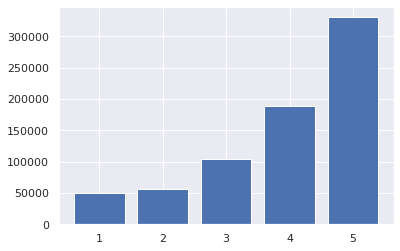

In [9]:
fig, ax = plt.subplots()
ax.bar(df['stars'].value_counts().index,df['overall'].value_counts())

In [10]:
balanced_10k_each = pd.concat([one_star_reviews.iloc[:10000], two_star_reviews.iloc[:10000], three_star_reviews.iloc[:10000], four_star_reviews.iloc[:10000], five_star_reviews.iloc[:10000]])
balanced_40k_each = pd.concat([one_star_reviews.iloc[:40000], two_star_reviews.iloc[:40000], three_star_reviews.iloc[:40000], four_star_reviews.iloc[:40000], five_star_reviews.iloc[:40000]])
balanced_40k_each['stars'].value_counts()

5    40000
4    40000
3    40000
2    40000
1    40000
Name: stars, dtype: int64

In [11]:
import nltk
nltk_stopwords = nltk.corpus.stopwords.words('english')
tokenizer = nltk.RegexpTokenizer(r"\w+")

stemmer = nltk.stem.PorterStemmer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def NLP_cleaner_mongodb(pandas_df, collection, document_column_name = 'reviewText'):
    '''
    takes pandas dataframe and inserts entries into mongodb collection with lemmatized text
    '''
    '''
    df = pandas_df
    df['unicode'] = df[document_column_name].str.encode('ascii', 'ignore').str.decode('ascii')
    df['lower'] = df['unicode'].apply(lambda x: x.lower())
    df['remove_punct'] = df['lower'].apply(lambda x: tokenizer.tokenize(x))
    df['no_stopwords'] = df['remove_punct'].apply(lambda x: remove_stopwords(x))
    df['lemmatized'] = df['no_stopwords'].apply(lambda x: lemmatize_text(tokenize(x)))
    '''
    for row_num in range(pandas_df.shape[0]):
        row = (pandas_df.iloc[row_num])
        unicode = row[document_column_name].encode('ascii', 'ignore').decode('ascii')
        lower = unicode.lower()
        remove_punct = tokenize(lower)
        no_stopwords = remove_stopwords(remove_punct)
        lemmatized = lemmatize_text(tokenize(no_stopwords))
        stemmed = stem_text(tokenize(no_stopwords))
        collection.insert_one({'reviewerID': str(row['reviewerID']), 'asin':str(row['asin']), 'reviewerName':row['reviewerName'], 'reviewText': row['reviewText'], 'helpful':row['helpful'], 'overall':str(row['overall']), 'summary':row['summary'], 'unixReviewTime':str(row['unixReviewTime']), 'reviewTime':row['reviewTime'], 'lemmatized':lemmatized, 'stemmed':stemmed})
    
    
    


In [115]:
#NLP_cleaner_mongodb(df, reviews_cleaned)

In [12]:


def remove_punctuation(comment):
    no_punct = [word for word in comment if word not in string.punctuation]
    return ' '.join(no_punct)

def tokenize(comment):
    token = [word.lower() for word in tokenizer.tokenize(comment)]
    return token

def remove_stopwords(comment):
    no_stops_words = [word for word in comment if word not in nltk_stopwords]
    return ' '.join(no_stops_words)

def stem_text(comment):
    stem = [stemmer.stem(word) for word in comment]
    after_stem = ' '.join(stem)
    return after_stem

def lemmatize_text(comment):
    lemma = [lemmatizer.lemmatize(word) for word in comment]
    after_lemma = ' '.join(lemma)
    return after_lemma


In [57]:
df_first_50k = NLP_cleaner(df.loc[:50000, :], 'reviewText')
df_first_10k = NLP_cleaner(df.loc[:10000, :], 'reviewText')
df_first_5k = NLP_cleaner(df.loc[:5000, :], 'reviewText')
df_first_2k = NLP_cleaner(df.loc[:2000, :], 'reviewText')

/home/steven/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/home/steven/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/steven/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [18]:
multiNB(balanced_40k_each, 'lemmatized', max_features=5000,max_iter=10000)

((0.495775, 0.495775, 0.495775),
 array([[5543, 1770,  376,  273,  259],
        [2493, 3342, 1314,  626,  286],
        [1008, 1720, 2562, 1906,  734],
        [ 590,  585, 1393, 3403, 1907],
        [ 580,  295,  462, 1592, 4981]]),
 MultinomialNB())

<AxesSubplot:>

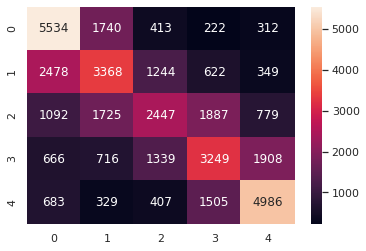

In [22]:
sns.heatmap([[5534, 1740,  413,  222,  312],
        [2478, 3368, 1244,  622,  349],
        [1092, 1725, 2447, 1887,  779],
        [ 666,  716, 1339, 3249, 1908],
        [ 683,  329,  407, 1505, 4986]], annot=True, fmt='g')

In [24]:
rf_test(balanced_40k_each, 'lemmatized', max_depth=5, n_estimators=)

((0.30385, 0.30385, 0.30385),
 array([[4072, 1059,  644, 1381,  803],
        [2914, 1394, 1103, 1509, 1058],
        [2060, 1108, 1437, 1979, 1462],
        [1694,  758, 1175, 2216, 2164],
        [1646,  620,  773, 1936, 3035]]),
 RandomForestClassifier(class_weight='balanced_subsample', max_depth=5,
                        n_estimators=10))

In [17]:
knn_classifier(balanced_10k_each, 'lemmatized')

(0.3619,
 array([[961, 515, 357, 118,  60],
        [707, 643, 396, 189,  69],
        [418, 486, 658, 309,  97],
        [245, 350, 503, 632, 234],
        [164, 211, 372, 581, 725]]))

In [12]:
def multiNB(pandas_df, text_column='reviewText', max_features = 1500, max_iter = 2000):

    X = pandas_df[text_column]
    y = pandas_df['overall']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    tvectorizer = CountVectorizer(max_features = max_features, strip_accents='ascii', token_pattern=r'(?u)\b\w\w+\b',lowercase=True)
    X_train_tvectorizer = tvectorizer.fit_transform(X_train)
    X_test_tvectorizer = tvectorizer.transform(X_test)


    mnb = MultinomialNB()
    mnb.fit(X_train_tvectorizer, y_train)
    predict = mnb.predict(X_test_tvectorizer)

    a = (accuracy_score(y_test, predict))
    p = (precision_score(y_test, predict, average='micro'))
    r = (recall_score(y_test, predict, average='micro'))

    cm = confusion_matrix(y_test, predict)
    
    return (a,p,r), cm, mnb

In [13]:
def rf_test(pandas_df, text_column = 'reviewText', n_est=10, max_depth = 40, max_feat=None):

    X = pandas_df[text_column]
    y = pandas_df['stars']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

    tvectorizer = TfidfVectorizer(max_features = max_feat, strip_accents='ascii', token_pattern=r'(?u)\b\w\w+\b', stop_words=stopwords.words('english'))
    X_train_tvectorizer = tvectorizer.fit_transform(X_train)
    X_test_tvectorizer = tvectorizer.transform(X_test)
    
    rf = RandomForestClassifier(n_estimators = n_est, max_depth = max_depth, class_weight='balanced_subsample')
    rf.fit(X_train_tvectorizer, y_train)
    predict = rf.predict(X_test_tvectorizer)

    a = (accuracy_score(y_test, predict))
    p = (precision_score(y_test, predict, average='micro'))
    r = (recall_score(y_test, predict, average='micro'))

    cm = confusion_matrix(y_test, predict)
    return (a,p,r), cm, rf


In [16]:
def knn_classifier(pandas_df, text_column = 'reviewText'):
    
    X = pandas_df[text_column]
    y = pandas_df['stars']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
    
    tvectorizer = TfidfVectorizer(token_pattern=r'(?u)\b\w\w+\b', stop_words=stopwords.words('english'))
    X_train_tvectorizer = tvectorizer.fit_transform(X_train)
    X_test_tvectorizer = tvectorizer.transform(X_test)
    
    knn = KNeighborsClassifier(n_neighbors = 2).fit(X_train_tvectorizer, y_train)
    accuracy = knn.score(X_test_tvectorizer, y_test)
    
    knn_predictions = knn.predict(X_test_tvectorizer) 
    cm = confusion_matrix(y_test, knn_predictions)
    
    return accuracy, cm